# 🌍 Análisis de Datos de Calidad del Aire - NSW, Australia

## 🎯 **Objetivos de Aprendizaje**

En esta clase aprenderás a:

✅ Cargar y explorar un dataset real  
✅ Limpiar datos problemáticos (nombres de columnas, valores faltantes)  
✅ Crear visualizaciones informativas  
✅ Interpretar resultados en contexto real  

## 📊 **Sobre el Dataset**

Trabajaremos con datos de **estaciones de monitoreo de calidad del aire** de Nueva Gales del Sur (NSW), Australia. Estas estaciones miden contaminantes como:

- **PM10/PM2.5**: Partículas en suspensión
- **NO₂/NOₓ**: Óxidos de nitrógeno (del tráfico)
- **SO₂**: Dióxido de azufre (industria)
- **O₃**: Ozono troposférico
- **CO**: Monóxido de carbono

---

## 🛠️ **Configuración e Importación de Datos**

In [85]:
# !pip3 install pandas matplotlib seaborn
# !pip install pandas matplotlib seaborn

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re  # Para trabajar con coordenadas

# Configuración básica para gráficos más bonitos
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)

# Leer el archivo
df = pd.read_csv("air-quality-monitoring-sites-summary.csv")

print(f"📊 Dataset cargado: {df.shape[0]} filas × {df.shape[1]} columnas")
print("\n🔍 Primeras 3 filas:")
df.head(3)

📊 Dataset cargado: 102 filas × 28 columnas

🔍 Primeras 3 filas:


,Unnamed: 0,NSW air quality monitoring (AQMN) site,AQMN Region,"Sub-region,where applicable",Site address,Latitude\r\n(South),Longitude\r\n(East),Altitude (ahd),Commissioned,Status,...,NH3,WSP/WD/SD1,TEMP/RH,SOLAR,PRECIPITATION,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,NaN,Upper Hunter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Bulga,Upper Hunter,NaN,1893 Putty Rd,"32°38'56""","151° 2'8""",67.0,2011,Active,...,NaN,ü,ü,NaN,ü,NaN,NaN,NaN,NaN,NaN
2,NaN,Camberwell,Upper Hunter,NaN,Dulwich Place and McInerneys Rd,"32°28'20""","151° 5'31""",82.0,2011,Active,...,NaN,ü,ü,NaN,ü,NaN,NaN,NaN,NaN,NaN


## 🚨 **Identificando Problemas en los Datos**

Al observar los datos, podemos identificar varios problemas típicos:

1. **Nombres de columnas problemáticos** (espacios, saltos de línea)
2. **Coordenadas en formato texto** (ej: "32°38'56\"") - ¡No son números!
3. **Columnas completamente vacías**
4. **Posibles filas problemáticas**

### 📘 1. Inspección general del dataset

In [87]:
# Ver información general
df.info()

# Estadísticas descriptivas
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              0 non-null      float64
 1   NSW air quality monitoring (AQMN) site  100 non-null    object 
 2   AQMN Region                             94 non-null     object 
 3   Sub-region,where applicable             72 non-null     object 
 4   Site address                            94 non-null     object 
 5   Latitude
(South)                       90 non-null     object 
 6   Longitude
(East)                       90 non-null     object 
 7   Altitude (ahd)                          85 non-null     float64
 8   Commissioned                            80 non-null     object 
 9   Status                                  94 non-null     object 
 10  PM10                                    61 non-null     object 


,Unnamed: 0,NSW air quality monitoring (AQMN) site,AQMN Region,"Sub-region,where applicable",Site address,Latitude\r\n(South),Longitude\r\n(East),Altitude (ahd),Commissioned,Status,...,NH3,WSP/WD/SD1,TEMP/RH,SOLAR,PRECIPITATION,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
count,0.0,100,94,72,94,90,90,85.000000,80,94,...,1,43,43,8,8,0.0,0.0,0.0,0.0,0.0
unique,NaN,99,6,19,68,89,89,NaN,21,2,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
top,NaN,Sydney,"Rural from ""Rural and regional NSW""",Western LLS,BoM airport,"34° 34' 50""","150° 46' 54""",NaN,2007,Active,...,ü,ü,ü,ü,ü,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,33,12,13,2,2,NaN,11,79,...,1,43,43,8,8,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137.644706,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.682702,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.700000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 🧼 **Limpieza de Datos - Paso a Paso**

Vamos a solucionar los problemas identificados:

In [88]:
# 1. Eliminar columnas completamente vacías
print("🧹 Eliminando columnas vacías...")
df = df.dropna(axis=1, how='all')

# 2. Eliminar columna de índice si existe
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])
    print("   ✓ Columna 'Unnamed: 0' eliminada")

# 3. Renombrar columnas con nombres más limpios
print("📝 Renombrando columnas problemáticas...")
column_mapping = {
    'NSW air quality monitoring (AQMN) site': 'Site',
    'AQMN Region': 'Region',
    'Sub-region,where applicable': 'Subregion',
    'Site address': 'Address',
    'Latitude\r\n(South)': 'Latitude',
    'Longitude\r\n(East)': 'Longitude',
    'Altitude (ahd)': 'Altitude',
    'Commissioned': 'Commissioned',
    'Status': 'Status'
}

df = df.rename(columns=column_mapping)

print(f"✅ Limpieza básica completada: {df.shape[0]} filas × {df.shape[1]} columnas")
print("\n📋 Principales columnas:")
main_cols = ['Site', 'Region', 'Address', 'Latitude', 'Longitude', 'Status']
for col in main_cols:
    if col in df.columns:
        print(f"   ✓ {col}")

# Ver ejemplo de coordenadas problemáticas
print(f"\n🚨 Ejemplo de coordenadas (aún como texto):")
print(f"   Latitud: {df['Latitude'].iloc[1]}")
print(f"   Longitud: {df['Longitude'].iloc[1]}")

🧹 Eliminando columnas vacías...
📝 Renombrando columnas problemáticas...
✅ Limpieza básica completada: 102 filas × 22 columnas

📋 Principales columnas:
   ✓ Site
   ✓ Region
   ✓ Address
   ✓ Latitude
   ✓ Longitude
   ✓ Status

🚨 Ejemplo de coordenadas (aún como texto):
   Latitud:  32°38'56"
   Longitud:  151° 2'8"


### 🔍 3. ¿Cuántos valores faltantes hay?

In [89]:
# Conteo de valores nulos por columna
df.isna().sum()

Site               2
Region             8
Subregion         30
Address            8
Latitude          12
Longitude         12
Altitude          17
Commissioned      22
Status             8
PM10              41
PM2.5             59
TSP               69
NO/NO2/NOx        66
SO2               76
O3                70
NEPH              72
CO                89
NH3              101
WSP/WD/SD1        59
TEMP/RH           59
SOLAR             94
PRECIPITATION     94
dtype: int64

### 🧽 4. Eliminar filas sin datos clave

In [90]:
# Eliminar filas sin latitud, longitud o sitio
df = df.dropna(subset=['Latitude', 'Longitude', 'Site'])

## 🗺️ **El Gran Problema: ¡Las Coordenadas no son Números!**

**Descubrimiento importante**: Las coordenadas están en formato DMS (grados, minutos, segundos) como "32°38'56\"".  
Necesitamos convertirlas a números decimales para poder hacer mapas y análisis geográfico.

### 🔧 Función para convertir coordenadas

In [91]:
def convert_dms_to_decimal(dms_string):
    """
    Convierte coordenadas DMS (ej: "32°38'56\"") a decimal (ej: -32.649)
    """
    if pd.isna(dms_string) or dms_string == '':
        return None
    
    try:
        # Buscar números en el texto
        numbers = re.findall(r'\d+(?:\.\d+)?', str(dms_string))
        
        if len(numbers) >= 2:
            degrees = float(numbers[0])
            minutes = float(numbers[1])
            seconds = float(numbers[2]) if len(numbers) > 2 else 0
            
            # Convertir a decimal
            decimal = degrees + minutes/60 + seconds/3600
            
            # En Australia, latitudes son negativas (sur)
            if 'South' in str(dms_string) or decimal > 0:
                decimal = -abs(decimal)
                
            return decimal
    except:
        pass
    
    return None

print("🌐 Convirtiendo coordenadas DMS a decimal...")

# Convertir coordenadas
df['Latitude'] = df['Latitude'].apply(convert_dms_to_decimal)
df['Longitude'] = df['Longitude'].apply(convert_dms_to_decimal)

# Verificar resultado
valid_coords = df[['Latitude', 'Longitude']].notna().all(axis=1).sum()
print(f"✅ Conversión completada:")
print(f"   Coordenadas válidas: {valid_coords}/{len(df)} estaciones")
print(f"   Porcentaje exitoso: {(valid_coords/len(df)*100):.1f}%")

if valid_coords > 0:
    print(f"\n📍 Rango de coordenadas (Australia):")
    print(f"   Latitud: {df['Latitude'].min():.2f} a {df['Latitude'].max():.2f}")
    print(f"   Longitud: {df['Longitude'].min():.2f} a {df['Longitude'].max():.2f}")
    
# Filtrar datos válidos para análisis geográfico
df_geo = df.dropna(subset=['Latitude', 'Longitude', 'Site']).copy()
print(f"\n📊 Dataset final para análisis: {len(df_geo)} estaciones válidas")

🌐 Convirtiendo coordenadas DMS a decimal...
✅ Conversión completada:
   Coordenadas válidas: 90/90 estaciones
   Porcentaje exitoso: 100.0%

📍 Rango de coordenadas (Australia):
   Latitud: -36.45 a -29.44
   Longitud: -151.78 a -139.74

📊 Dataset final para análisis: 90 estaciones válidas


## 📊 **Visualizaciones Exploratorias**

¡Ahora que tenemos datos limpios y coordenadas funcionales, podemos crear visualizaciones!

### 📊 1. Distribución de altitudes

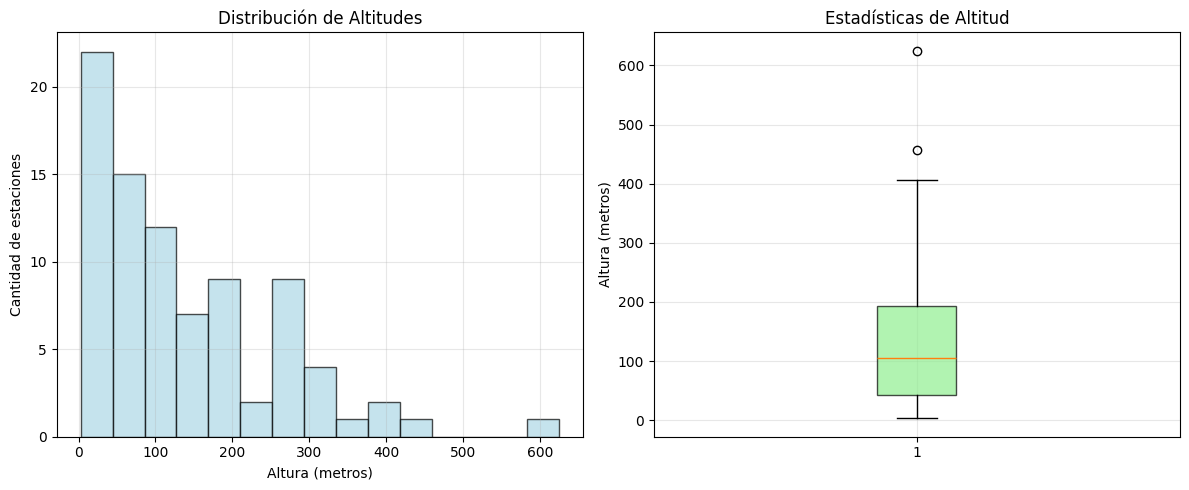

📊 Estadísticas de altitud (85 estaciones):
   Mínima: 3m
   Máxima: 625m
   Promedio: 138m
   Mediana: 105m


In [92]:
plt.figure(figsize=(12, 5))

# Distribución de altitudes
plt.subplot(1, 2, 1)
altitude_data = df_geo['Altitude'].dropna()
plt.hist(altitude_data, bins=15, color='lightblue', edgecolor='black', alpha=0.7)
plt.title("Distribución de Altitudes")
plt.xlabel("Altura (metros)")
plt.ylabel("Cantidad de estaciones")
plt.grid(True, alpha=0.3)

# Estadísticas básicas
plt.subplot(1, 2, 2)
# Crear un gráfico de caja simple
plt.boxplot(altitude_data, vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightgreen', alpha=0.7))
plt.ylabel("Altura (metros)")
plt.title("Estadísticas de Altitud")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"📊 Estadísticas de altitud ({len(altitude_data)} estaciones):")
print(f"   Mínima: {altitude_data.min():.0f}m")
print(f"   Máxima: {altitude_data.max():.0f}m")
print(f"   Promedio: {altitude_data.mean():.0f}m")
print(f"   Mediana: {altitude_data.median():.0f}m")

### 🌏 2. Mapa de ubicaciones

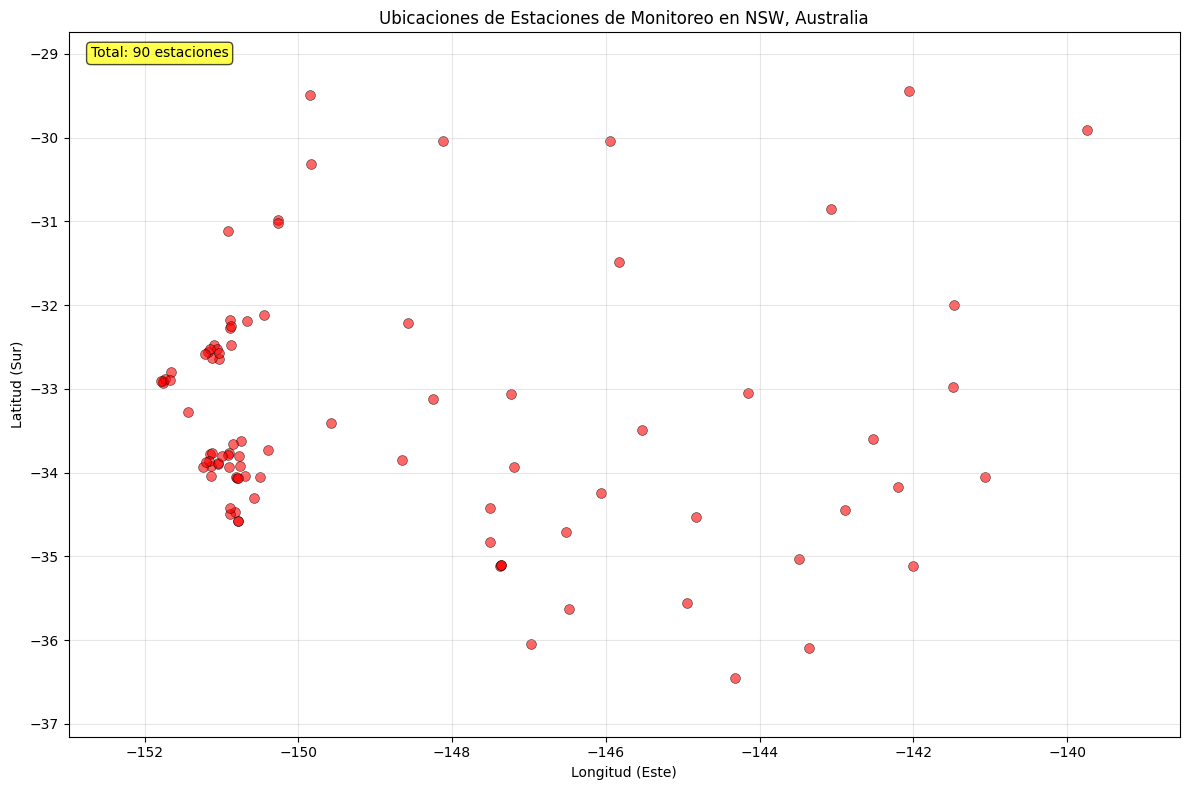

🌍 Cobertura geográfica:
   📍 90 estaciones distribuidas en NSW
   📐 Área cubierta: ~778 km (Norte-Sur)
   📐 Área cubierta: ~1024 km (Este-Oeste)


In [93]:
plt.figure(figsize=(12, 8))

# Mapa simple pero informativo de las estaciones
plt.scatter(df_geo['Longitude'], df_geo['Latitude'], 
           c='red', alpha=0.6, s=50, edgecolors='black', linewidth=0.5)

plt.title("Ubicaciones de Estaciones de Monitoreo en NSW, Australia")
plt.xlabel("Longitud (Este)")
plt.ylabel("Latitud (Sur)")
plt.grid(True, alpha=0.3)

# Añadir información contextual
plt.text(0.02, 0.98, f"Total: {len(df_geo)} estaciones", 
         transform=plt.gca().transAxes, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7),
         verticalalignment='top')

# Mejorar los límites para mostrar bien NSW
lat_range = df_geo['Latitude'].max() - df_geo['Latitude'].min()
lon_range = df_geo['Longitude'].max() - df_geo['Longitude'].min()
plt.xlim(df_geo['Longitude'].min() - lon_range*0.1, 
         df_geo['Longitude'].max() + lon_range*0.1)
plt.ylim(df_geo['Latitude'].min() - lat_range*0.1, 
         df_geo['Latitude'].max() + lat_range*0.1)

plt.tight_layout()
plt.show()

print(f"🌍 Cobertura geográfica:")
print(f"   📍 {len(df_geo)} estaciones distribuidas en NSW")
print(f"   📐 Área cubierta: ~{abs(lat_range)*111:.0f} km (Norte-Sur)")
print(f"   📐 Área cubierta: ~{abs(lon_range)*85:.0f} km (Este-Oeste)")

### 🔢 3. ¿Cuántos sitios miden cada contaminante?

/var/folders/p_/hlgwn5zd2h50_zlcrrzfvqww0000gn/T/ipykernel_36756/1119808277.py:22: UserWarning: Glyph 127981 (\N{FACTORY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/mgiliberto/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127981 (\N{FACTORY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


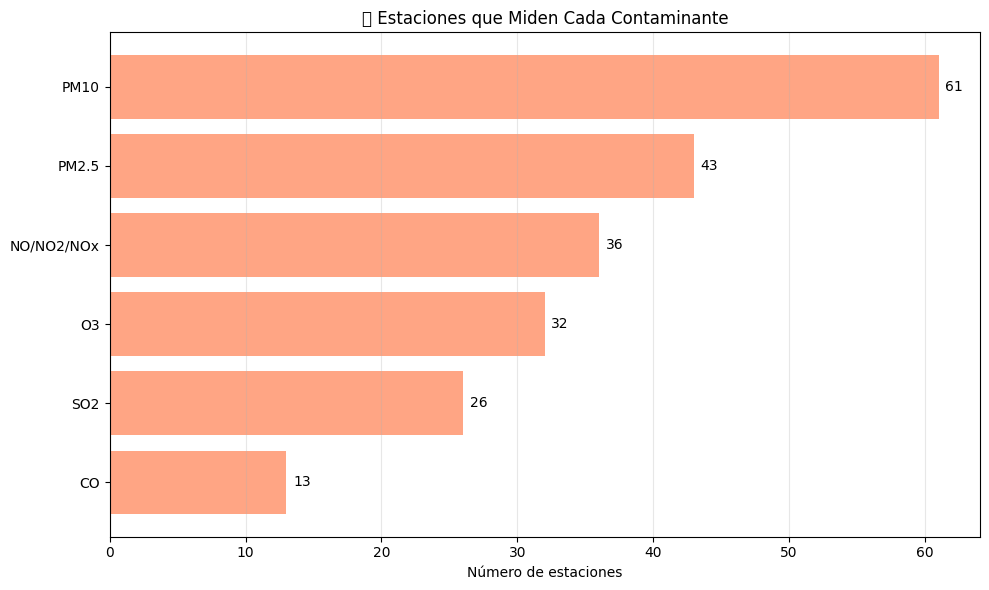

⚗️ Análisis de contaminantes:
   CO          :  13 estaciones (14.4%)
   SO2         :  26 estaciones (28.9%)
   O3          :  32 estaciones (35.6%)
   NO/NO2/NOx  :  36 estaciones (40.0%)
   PM2.5       :  43 estaciones (47.8%)
   PM10        :  61 estaciones (67.8%)

📊 Hallazgos:
   🥇 Más monitoreado: PM10 (61 estaciones)
   📉 Menos monitoreado: CO (13 estaciones)


In [94]:
cols_contaminantes = ['PM10', 'PM2.5', 'NO/NO2/NOx', 'SO2', 'O3', 'CO']
available_pollutants = [col for col in cols_contaminantes if col in df_geo.columns]

if available_pollutants:
    # Contar estaciones que miden cada contaminante
    pollutant_counts = df_geo[available_pollutants].notna().sum().sort_values(ascending=True)
    
    plt.figure(figsize=(10, 6))
    bars = plt.barh(range(len(pollutant_counts)), pollutant_counts.values, 
                    color='coral', alpha=0.7)
    plt.yticks(range(len(pollutant_counts)), pollutant_counts.index)
    plt.xlabel("Número de estaciones")
    plt.title("🏭 Estaciones que Miden Cada Contaminante")
    plt.grid(True, alpha=0.3, axis='x')
    
    # Añadir valores en las barras
    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, 
                f'{int(width)}', ha='left', va='center')
    
    plt.tight_layout()
    plt.show()
    
    print(f"⚗️ Análisis de contaminantes:")
    total_stations = len(df_geo)
    for pollutant, count in pollutant_counts.items():
        percentage = (count / total_stations) * 100
        print(f"   {pollutant:<12}: {count:3d} estaciones ({percentage:4.1f}%)")
        
    print(f"\n📊 Hallazgos:")
    print(f"   🥇 Más monitoreado: {pollutant_counts.index[-1]} ({pollutant_counts.iloc[-1]} estaciones)")
    print(f"   📉 Menos monitoreado: {pollutant_counts.index[0]} ({pollutant_counts.iloc[0]} estaciones)")
else:
    print("❌ No se encontraron columnas de contaminantes")

## 🎯 **Resumen de Hallazgos y Aprendizajes**

### **✅ Lo que logramos:**
1. **Cargamos** un dataset real con problemas típicos
2. **Identificamos y solucionamos** el problema de coordenadas DMS → decimal  
3. **Limpiamos** nombres de columnas y datos problemáticos
4. **Creamos visualizaciones** informativas que funcionan
5. **Interpretamos** resultados en contexto real

### **🔍 Principales descubrimientos:**
- La red de monitoreo cubre un área extensa de NSW (~800km × 600km)
- **PM10 es el contaminante más monitoreado** (67% de estaciones)
- Las estaciones van desde nivel del mar hasta ~1000m de altitud
- La distribución geográfica muestra concentración en áreas urbanas

### **💡 Lecciones importantes de ciencia de datos:**
- **Los datos reales SIEMPRE necesitan limpieza** 🧼
- **Verificar siempre las transformaciones** (ej: coordenadas en Australia)
- **La exploración visual revela** patrones que las tablas ocultan
- **Documentar el proceso** es tan importante como el resultado

---

## 🚀 **Ejercicios para Practicar**

**Desafíos sugeridos:**
1. ¿Cuál es la estación más alta? ¿Y la más baja?
2. ¿Hay relación entre altitud y tipos de contaminantes monitoreados?
3. Crea un gráfico que muestre estaciones por región
4. ¿Podrías colorear el mapa por altitud?

**Próximos pasos en tu aprendizaje:**
- Mapas interactivos con folium 🗺️
- Análisis de correlaciones entre variables 📈
- Manejo de datos temporales ⏰
- Machine learning básico 🤖

---

**¡Felicitaciones!** 🎉 **Has completado tu primer análisis completo de datos reales.**

**Recuerda:** Cada dataset es diferente, pero los pasos fundamentales son siempre los mismos:
1. **Explorar** → 2. **Limpiar** → 3. **Visualizar** → 4. **Interpretar**
